<a href="https://colab.research.google.com/github/Abdallah2014/3MTT-AI-ML/blob/master/Mini_project_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini-Project: Exploring Multiple Linear Regression

Objective:

This project aims to develop a multiple linear regression model that predicts a dependent variable based on multiple independent variables. The goal is to:

1.	Understand multiple linear regression and how it models relationships.
2.	Prepare and preprocess data for regression analysis.
3.	Train a multiple linear regression model to make predictions.
4.	Evaluate model performance using statistical metrics.
5.	Visualize relationships between variables.

Dataset Selection

A synthetic dataset is used "House Price Prediction" dataset, where:
•	Dependent Variable (y): House Price
•	Independent Variables (X):
o	Square Footage
o	Number of Bedrooms
o	Number of Bathrooms

This dataset helps us understand how different house features affect price, making it an intuitive example.

Python Code for Multiple Linear Regression


Dataset Overview:
   SquareFeet  Bedrooms  Bathrooms          Price
0        1660         5          3  292807.841985
1        2094         2          1  345064.110317
2        1930         2          3  316609.531218
3        1895         1          2  347565.400024
4        2438         4          1  418959.401934


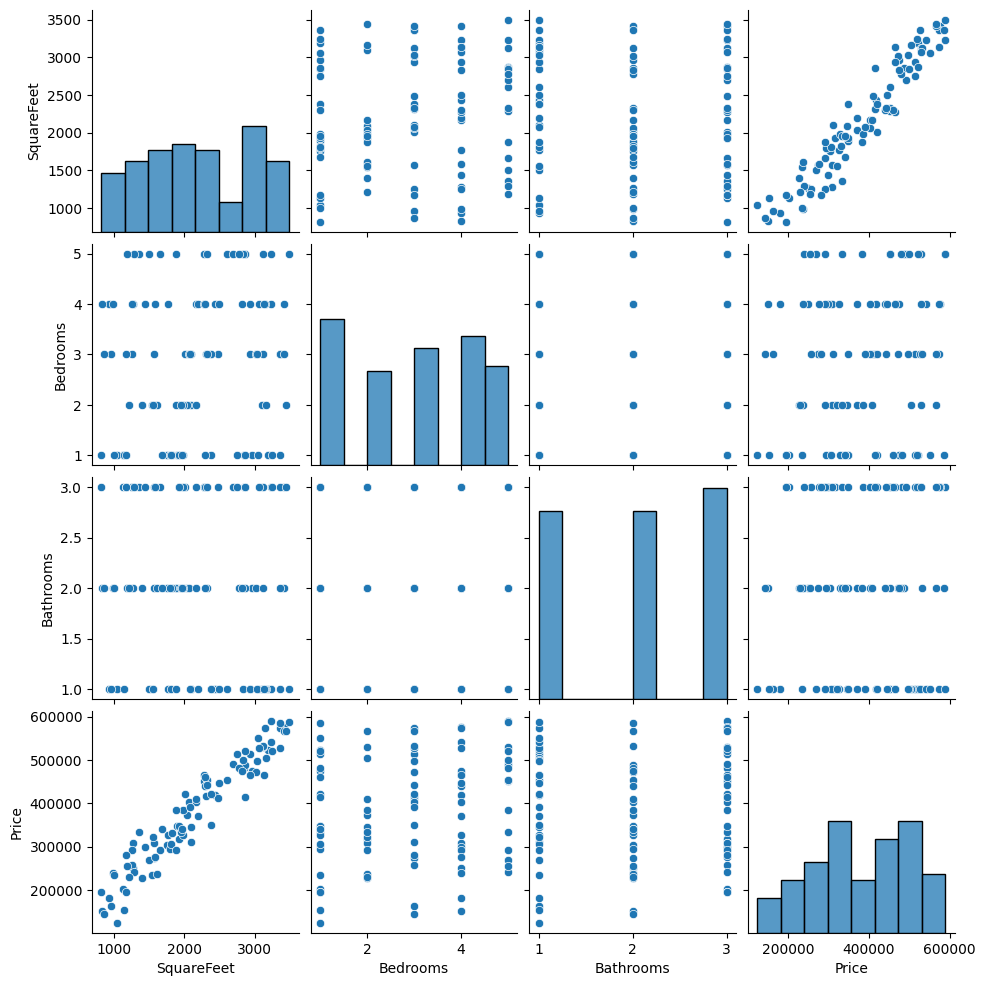


Model Performance Metrics:
Mean Absolute Error (MAE): 24902.26
Mean Squared Error (MSE): 943234998.89
Root Mean Squared Error (RMSE): 30712.13
R-squared Score (R²): 0.95


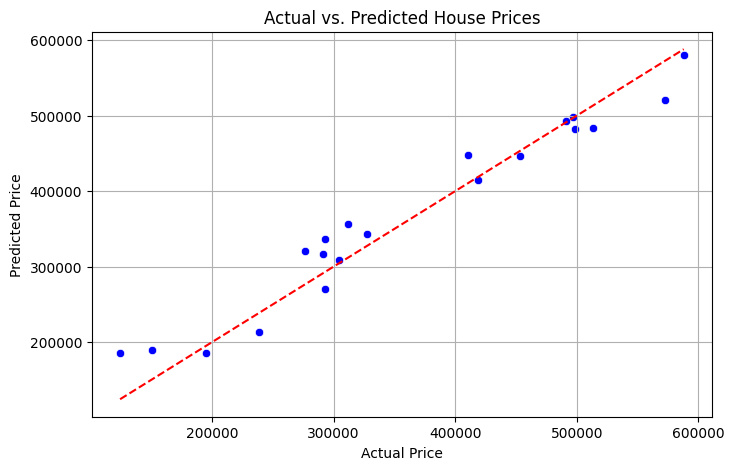

In [1]:
#Python Code for Multiple Linear Regression
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate Sample Data (Simulating a Real Dataset)
np.random.seed(42)
n_samples = 100

# Independent variables (Predictors)
square_feet = np.random.randint(800, 3500, n_samples)  # Size of the house in sq ft
bedrooms = np.random.randint(1, 6, n_samples)          # Number of bedrooms
bathrooms = np.random.randint(1, 4, n_samples)         # Number of bathrooms

# Dependent variable (Target: House Price)
house_price = (square_feet * 150) + (bedrooms * 10000) + (bathrooms * 12000) + np.random.normal(0, 30000, n_samples)

# Convert to DataFrame
df = pd.DataFrame({'SquareFeet': square_feet, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms, 'Price': house_price})

# Display first few rows
print("Dataset Overview:")
print(df.head())

# Step 2: Data Visualization
sns.pairplot(df)
plt.show()

# Step 3: Split Data into Features (X) and Target (y)
X = df[['SquareFeet', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

# Step 7: Visualizing Actual vs. Predicted Prices
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.show()
